# Imports

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
import albumentations as A
from tqdm import tqdm

# Organize Folders and Filenames

In [35]:
path_test = './images/test/'
path_labels = './images/labels/'

In [38]:
# # Do this first before manual labeling
# for folder in os.listdir(path_test):
#     for count, filename in enumerate(os.listdir(path_test+'/'+folder)):
#         dst = folder + str(count) + '.jpeg'
#         src = path_test+ folder +'/'+ filename 
#         dst = path_test+ folder +'/'+ dst 
#         os.rename(src, dst)

### Manually label images using labelImg. When all original images are labeled, proceed to the next step
### https://github.com/tzutalin/labelImg

# Load Images

In [2]:
image = cv2.imread('./images/Sign_Language_Letter_Request/M/M1.jpg')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

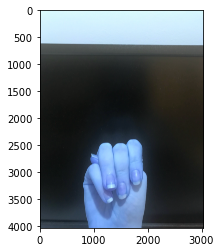

In [3]:
plt.imshow(image)

In [4]:
image.shape

(4032, 3024, 3)

In [5]:
load_bboxes = np.genfromtxt('./labels/M1.txt')
load_bboxes = list(load_bboxes)
bbox_cat = int(load_bboxes[0])
bboxes = load_bboxes[1:]
bboxes

[0.456845, 0.791915, 0.426918, 0.416171]

In [6]:
bbox_cat

12

In [7]:
load_bboxes

[12.0, 0.456845, 0.791915, 0.426918, 0.416171]

In [10]:
image.shape[1]

3024

In [9]:
img_ht = int(image.shape[0])
img_wd = int(image.shape[1])
bb_width = int(round(bboxes[2] * image.shape[1], 0))
bb_height = int(round(bboxes[3] * image.shape[0], 0))

print(f'Image height: {img_ht}')
print(f'Image width: {img_wd}')
print(f'Bbox height: {bb_height}')
print(f'Bbox width: {bb_width}')

Image height: 4032
Image width: 3024
Bbox height: 1678
Bbox width: 1291


In [24]:
#         The `coco` format
#             `[x_min, y_min, width, height]`, e.g. [97, 12, 150, 200].
#         The `pascal_voc` format
#             `[x_min, y_min, x_max, y_max]`, e.g. [97, 12, 247, 212].
#         The `albumentations` format
#             is like `pascal_voc`, but normalized,
#             in other words: [x_min, y_min, x_max, y_max]`, e.g. [0.2, 0.3, 0.4, 0.5].
#         The `yolo` format
#             `[x, y, width, height]`, e.g. [0.1, 0.2, 0.3, 0.4];

In [25]:
# pascal_voc format 
x_min = int((img_wd * bboxes[0]) - (bb_width/2))
x_max = int((img_wd * bboxes[0]) + (bb_width/2))
y_min = int(img_ht * bboxes[1] - (bb_width/2))
y_max = int(img_ht * bboxes[1] + (bb_width/2))
new_bboxes = [x_min, y_min, x_max, y_max]
print(f'Bbox x_min: {x_min}')
print(f'Bbox x_max: {x_max}')
print(f'Bbox y_min: {y_min}')
print(f'Bbox y_max: {y_max}')
print(f'new_bboxes: {new_bboxes}')

Bbox x_min: 289
Bbox x_max: 2330
Bbox y_min: 1213
Bbox y_max: 3254
new_bboxes: [289, 1213, 2330, 3254]


In [26]:
# # Yolo format
# x = bboxes[0]
# y = bboxes[1]
# width = bboxes[2]
# height = bboxes[3]
# yolo_bboxes = [x, y, width, height]
# print(f'Bbox x: {x}')
# print(f'Bbox y: {y}')
# print(f'Bbox width: {width}')
# print(f'Bbox height: {height}')
# print(f'yolo_bboxes: {yolo_bboxes}')

# Show image and Bounding Box Function

In [27]:
# Inspired by Venelin Valkov
# Source: https://www.curiousily.com/posts/image-data-augmentation-for-tensorflow-2-keras-and-pytorch-with-albumentations-in-python/
category_id_to_name = {0: 'A', 
                       1: 'B',
                       2: 'C', 
                       3: 'D',
                       4: 'E', 
                       5: 'F',
                       6: 'G', 
                       7: 'H',
                       8: 'I', 
                       9: 'J',
                       11: 'K',
                       12: 'L',
                       13: 'M',
                       14: 'N',
                       15: 'O',
                       16: 'P',
                       17: 'Q',
                       18: 'R',
                       19: 'S',
                       20: 'T',
                       21: 'U',
                       22: 'V',
                       23: 'W',
                       24: 'X',
                       25: 'Y',
                       26: 'Z',
                       }
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255) # White

def show_image(image, bbox, bbox_cat, category_id_to_name):
    class_name = category_id_to_name[bbox_cat]
    image = visualize_bbox(image.copy(), bbox, class_name)
    f = plt.figure(figsize=(10,10))
    plt.imshow(
        cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
        interpolation='nearest'
    )
    plt.axis('off')
    f.tight_layout()
    plt.show()
    
def visualize_bbox(image, bbox, class_name, color=BOX_COLOR, thickness=4):
    x_min, y_min, x_max, y_max = map(lambda v: int(v), bbox)
    
    cv2.rectangle(
        image,
        (x_min, y_min),
        (x_max, y_max),
        color=color,
        thickness=thickness
    )
        
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 2.7, 3)    
    cv2.rectangle(image, (x_min, y_min - int(1.2 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        image,
#         text=class_name,
        text= category_id_to_name[bbox_cat],
        org=(x_min, y_min - int(.1 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=2.35, 
        color=TEXT_COLOR,
        thickness=3,
        lineType=cv2.LINE_AA,
    )
    return image



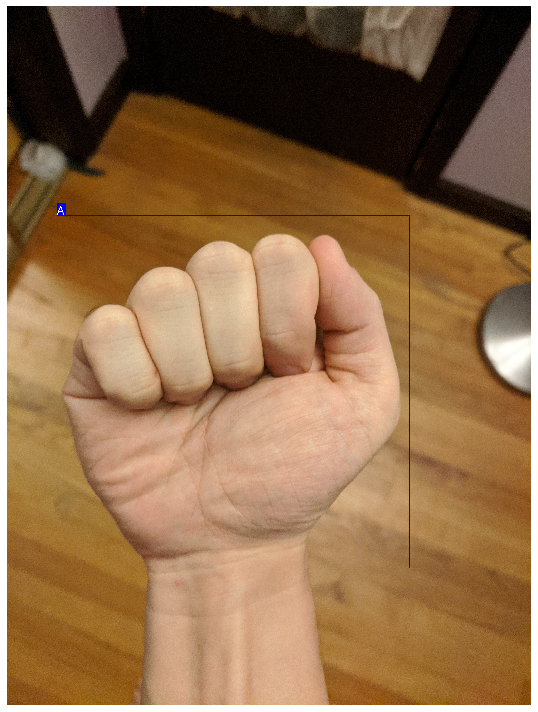

In [28]:
show_image(image, new_bboxes, bbox_cat, category_id_to_name)

In [29]:
def show_augmented(augmentation, image, bbox, class_name):
    augmented = augmentation(image=image, bboxes=[bbox], class_name=[class_name])
    show_image(augmented['image'], augmented['bboxes'][0], bbox_cat, category_id_to_name)

In [30]:
# [x_min, y_min, x_max, y_max]
bbox_params = A.BboxParams(
    format= 'pascal_voc',
    min_area=1,
    min_visibility=0.5,
    label_fields=['class_name']
)

In [31]:
# Source: https://github.com/albumentations-team/albumentations_examples/blob/master/notebooks/example_bboxes.ipynb
aug = A.Compose([
    A.LongestMaxSize(max_size=1024),
    A.PadIfNeeded(min_height=1024, min_width=1024, border_mode=0,p=1.0),
    A.ShiftScaleRotate(shift_limit=.25, scale_limit=0.2, p=0.3),
    A.RandomSizedCrop((900, 1000), 1024, 1024, p=.2),
    A.HorizontalFlip(p=.5),
    A.Rotate(limit=30,p=.8),
    A.MultiplicativeNoise(p=.2),
    A.RGBShift(r_shift_limit=40, g_shift_limit=40, b_shift_limit=40, p=.3),
    A.Blur(blur_limit=25, p=.2),
    A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.35,p=.5),
    A.HueSaturationValue(p=.3),
    A.CoarseDropout(max_holes=9,min_width=30, max_width=250, min_height=30, max_height=250,p=.2),
    A.OneOf([A.IAAAdditiveGaussianNoise(),
        A.GaussNoise(var_limit=(10, 50),mean=50)], p=0.2),
    A.OneOf([
        A.MotionBlur(p=0.2),
        A.MedianBlur(blur_limit=3, p=0.1),
        A.Blur(blur_limit=3, p=0.1)], p=0.2),
    A.OneOf([
        A.IAASharpen(),
        A.IAAEmboss(),
        A.RandomBrightnessContrast(),
        A.RandomGamma(gamma_limit=[50,300], p=.2),
        A.ToGray()], p=0.3),
]
    , bbox_params=bbox_params)


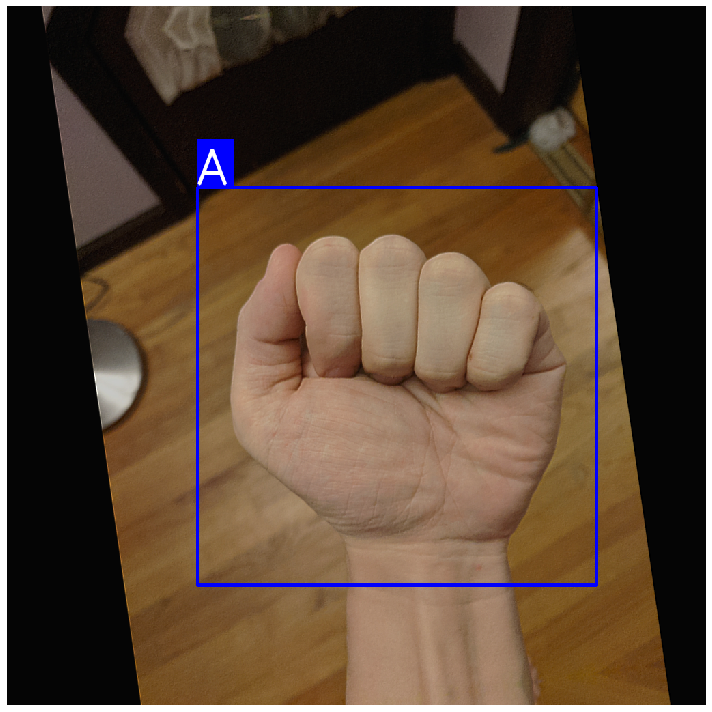

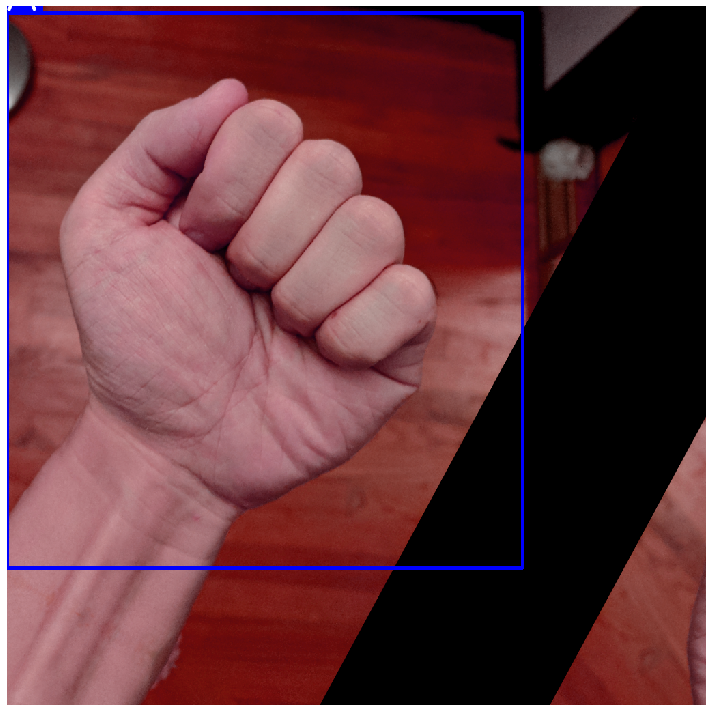

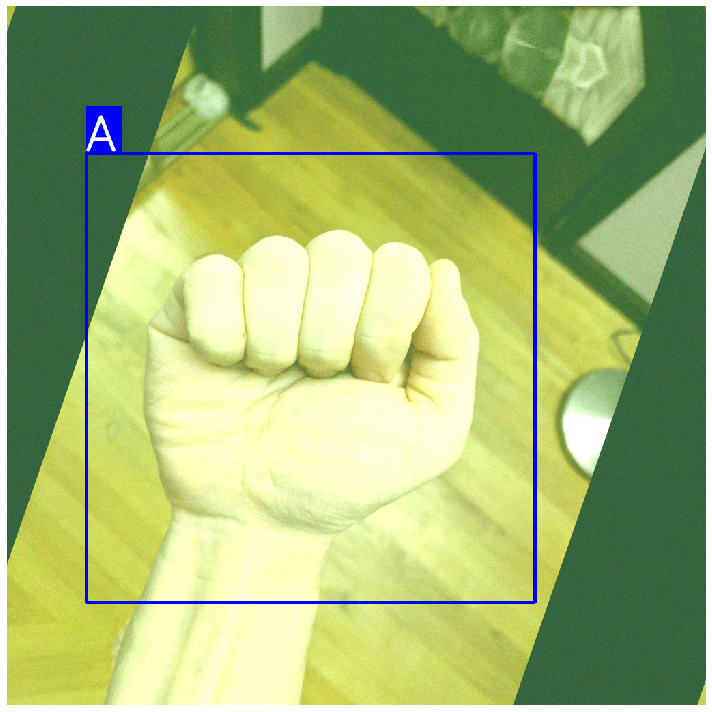

In [32]:
for i in range(3):
    show_augmented(aug, image, new_bboxes, category_id_to_name)

# Creating Augmented Dataset
using the format:  
path/to/image.jpg,x1,y1,x2,y2,class_name

In [33]:
bbox_cat

0

In [ ]:
path_test = './images/test/'
path_labels = './images/labels/'
DATASET_PATH = 'data/aug_data'
IMAGES_PATH = f'{DATASET_PATH}/images'
os.makedirs(DATASET_PATH, exist_ok=True)
os.makedirs(IMAGES_PATH, exist_ok=True)

load_bboxes = np.genfromtxt('./labels/B0.txt')
load_bboxes = list(load_bboxes)
bbox_cat = int(load_bboxes[0])
bboxes = load_bboxes[1:]

rows = []

for folder in os.listdir(path_test):
    for count, filename in enumerate(os.listdir(path_test+'/'+folder)):
        dst = folder + str(count) + '.jpeg'
        src = path_test+ folder +'/'+ filename 
        dst = path_test+ folder +'/'+ dst 
        os.rename(src, dst)
        
        for i in range(10):
#             class_name = bbox_cat
            augmented = aug(image=image, bboxes=[new_bboxes], class_name=[bbox_cat])
            file_name = f'{filename}{i}'
            for bbox in augmented['bboxes']:
                x_min, y_min, x_max, y_max = map(lambda v: int(v), bbox)

                rows.append({
                    'file_name': f'images/{file_name}',
                    'x_min':x_min,
                    'y_min':y_min,
                    'x_max':x_max,
                    'y_max':y_max,
                    'class':class_name
                })
            cv2.imwrite(f'{IMAGES_PATH}/{file_name}', augmented['image'])
pd.DataFrame(rows).to_csv(f'{DATASET_PATH}/annotations.csv', header=True, index=None)